In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
import pandas as pd

# Load your dataset
data = pd.read_csv('gdrive/My Drive/Klasifikasi Tingkat Kemiskinan di Indonesia.csv', sep=';')

# Preview the first few rows
print(data.head())

  Provinsi       Kab/Kota  \
0     ACEH       Simeulue   
1     ACEH   Aceh Singkil   
2     ACEH   Aceh Selatan   
3     ACEH  Aceh Tenggara   
4     ACEH     Aceh Timur   

  Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)  \
0                                              18,98                
1                                              20,36                
2                                              13,18                
3                                              13,41                
4                                              14,45                

  Rata-rata Lama Sekolah Penduduk 15+ (Tahun)  \
0                                        9,48   
1                                        8,68   
2                                        8,88   
3                                        9,67   
4                                        8,21   

   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)  \
0                                             71

In [19]:
# Define numeric columns
numeric_columns = [
    'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)',
    'Rata-rata Lama Sekolah Penduduk 15+ (Tahun)',
    'Indeks Pembangunan Manusia',
    'Umur Harapan Hidup (Tahun)',
    'Persentase rumah tangga yang memiliki akses terhadap sanitasi layak',
    'Persentase rumah tangga yang memiliki akses terhadap air minum layak',
    'Tingkat Pengangguran Terbuka',
    'Tingkat Partisipasi Angkatan Kerja',
    'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)',
    'PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)'
]

# Replace commas with periods and convert to float
for col in numeric_columns:
    if col in data.columns:  # Ensure the column exists
        data[col] = data[col].astype(str).str.replace(',', '.', regex=False).astype(float)

# Drop rows with missing values
data_clean = data.dropna()

# Display information about the cleaned data
print(data_clean.info())

# Scale numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean[numeric_columns])


<class 'pandas.core.frame.DataFrame'>
Index: 514 entries, 0 to 513
Data columns (total 13 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Provinsi                                                              514 non-null    object 
 1   Kab/Kota                                                              514 non-null    object 
 2   Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)       514 non-null    float64
 3   Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                           514 non-null    float64
 4   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)          514 non-null    float64
 5   Indeks Pembangunan Manusia                                            514 non-null    float64
 6   Umur Harapan Hidup (Tahun)                                            514 non-null    float64
 7   Pers

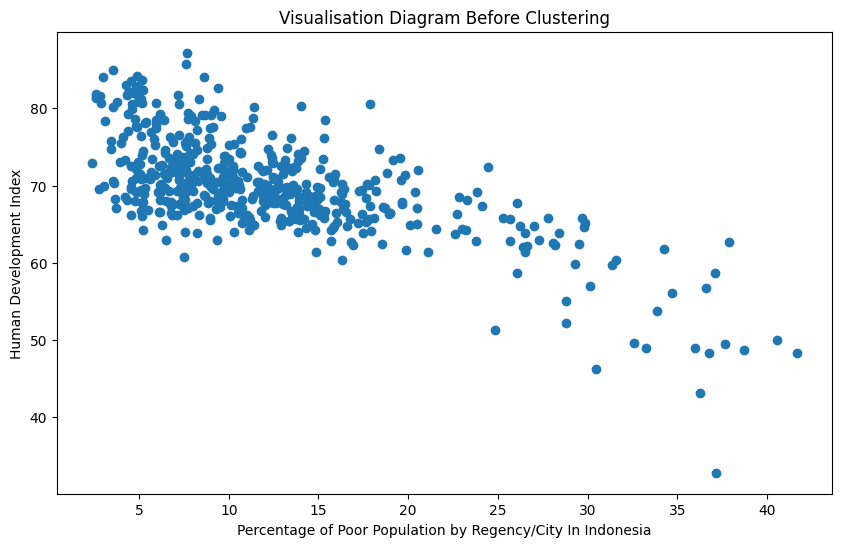

In [14]:
# Data visualization between Percentage of Poor Population and Human Development Index before clustering
plt.figure(figsize=(10, 6))
plt.scatter(
    data['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'],
    data['Indeks Pembangunan Manusia']
)
plt.title('Visualisation Diagram Before Clustering')
plt.xlabel('Percentage of Poor Population by Regency/City In Indonesia')
plt.ylabel('Human Development Index')
plt.show()

In [51]:
# Grouping data into 3 cluster groups
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(data_clean[['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)', 'Indeks Pembangunan Manusia']])

# Adding Cluster cloumuns
data_clean['cluster'] = y_predicted
data_clean.head()
print(data_clean)

# Displaying Centroid Values
# print(km.cluster_centers_)

    Provinsi       Kab/Kota  \
0       ACEH       Simeulue   
1       ACEH   Aceh Singkil   
2       ACEH   Aceh Selatan   
3       ACEH  Aceh Tenggara   
4       ACEH     Aceh Timur   
..       ...            ...   
509    PAPUA         Puncak   
510    PAPUA        Dogiyai   
511    PAPUA     Intan Jaya   
512    PAPUA         Deiyai   
513    PAPUA  Kota Jayapura   

     Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)  \
0                                                18.98                 
1                                                20.36                 
2                                                13.18                 
3                                                13.41                 
4                                                14.45                 
..                                                 ...                 
509                                              36.26                 
510                                              28

<ipython-input-51-528ffa8bdeef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['cluster'] = y_predicted


In [52]:
# Counting cluster in each groups
cluster_counts = data_clean['cluster'].value_counts()

# Display the count of rows for each cluster
print(cluster_counts)

cluster
0    302
2    157
1     55
Name: count, dtype: int64


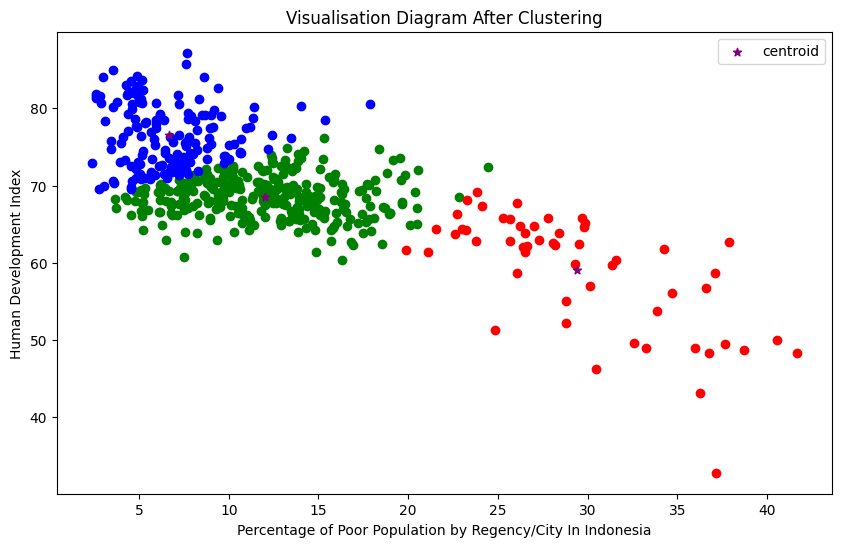

In [53]:
# Data visualization between Percentage of Poor Population and Human Development Index after clustering
df1 = data_clean[data_clean.cluster==0]
df2 = data_clean[data_clean.cluster==1]
df3 = data_clean[data_clean.cluster==2]

plt.figure(figsize=(10, 6))
plt.title('Visualisation Diagram After Clustering')
plt.xlabel('Percentage of Poor Population by Regency/City In Indonesia')
plt.ylabel('Human Development Index')
plt.scatter(df1['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'],
            df1['Indeks Pembangunan Manusia'], color='green')
plt.scatter(df2['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'],
            df2['Indeks Pembangunan Manusia'], color='red')
plt.scatter(df3['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'],
            df3['Indeks Pembangunan Manusia'], color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.show()

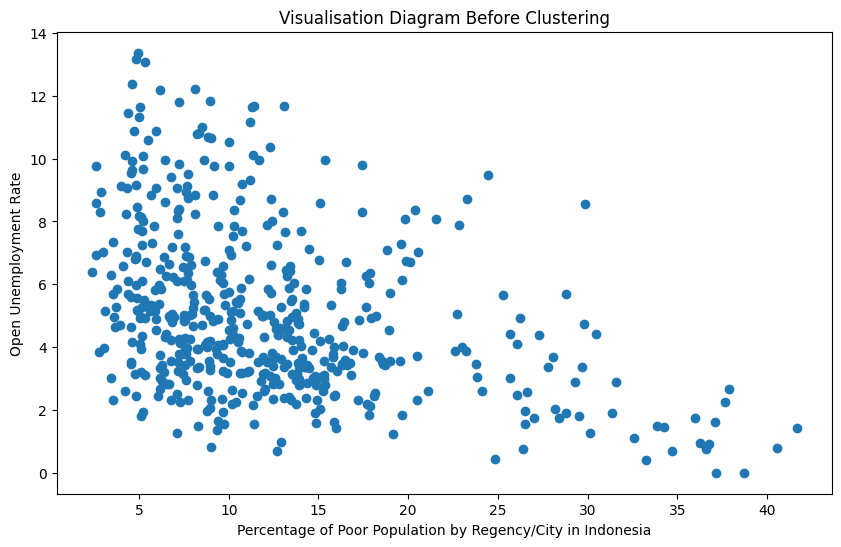

In [9]:
# Data visualization between the Percentage of Poor Population and the Open Unemployment Rate Before Clustering
plt.figure(figsize=(10, 6))
plt.scatter(
    data['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'],
    data['Tingkat Pengangguran Terbuka']
)
plt.title('Visualisation Diagram Before Clustering')
plt.xlabel('Percentage of Poor Population by Regency/City in Indonesia')
plt.ylabel('Open Unemployment Rate')
plt.show()

In [37]:
# Grouping data into 3 cluster groups
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(data_clean[['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)', 'Tingkat Pengangguran Terbuka']])

# Adding cluster columns
data_clean['cluster'] = y_predicted
data_clean.head()
print(data_clean)

# Displaying Centroid Values
# print(km.cluster_centers_)

    Provinsi       Kab/Kota  \
0       ACEH       Simeulue   
1       ACEH   Aceh Singkil   
2       ACEH   Aceh Selatan   
3       ACEH  Aceh Tenggara   
4       ACEH     Aceh Timur   
..       ...            ...   
509    PAPUA         Puncak   
510    PAPUA        Dogiyai   
511    PAPUA     Intan Jaya   
512    PAPUA         Deiyai   
513    PAPUA  Kota Jayapura   

     Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)  \
0                                                18.98                 
1                                                20.36                 
2                                                13.18                 
3                                                13.41                 
4                                                14.45                 
..                                                 ...                 
509                                              36.26                 
510                                              28

<ipython-input-37-0ac15b0cb33a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['cluster'] = y_predicted


In [39]:
# Grouping data into 3 cluster groups
cluster_counts = data_clean['cluster'].value_counts()

# Display the count of rows for each cluster
print(cluster_counts)

cluster
0    274
1    186
2     54
Name: count, dtype: int64


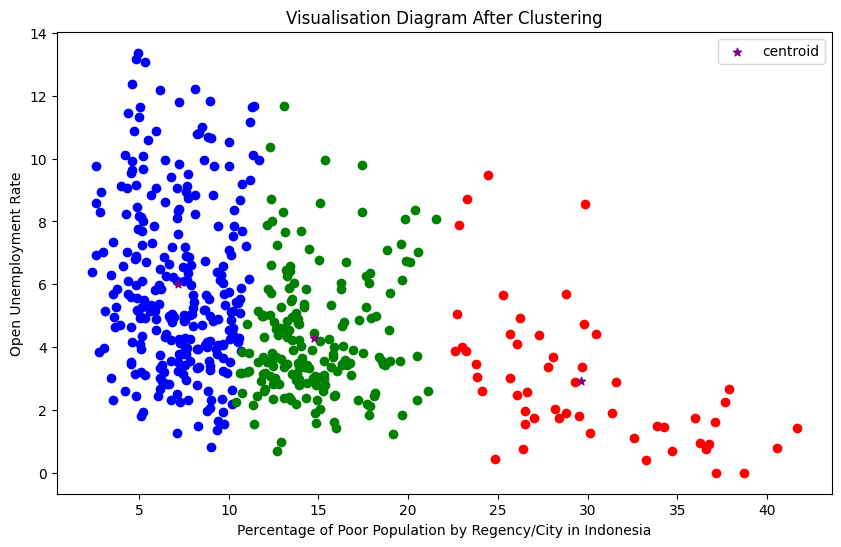

In [41]:
# Data visualization between the Percentage of Poor Population and the Open Unemployment Rate Before Clustering after clustering
df1 = data_clean[data_clean.cluster==0]
df2 = data_clean[data_clean.cluster==1]
df3 = data_clean[data_clean.cluster==2]

plt.figure(figsize=(10, 6))
plt.title('Visualisation Diagram After Clustering')
plt.xlabel('Percentage of Poor Population by Regency/City in Indonesia')
plt.ylabel('Open Unemployment Rate')
plt.scatter(df1['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'],
            df1['Tingkat Pengangguran Terbuka'], color='blue')
plt.scatter(df2['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'],
            df2['Tingkat Pengangguran Terbuka'], color='green')
plt.scatter(df3['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'],
            df3['Tingkat Pengangguran Terbuka'], color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.show()